# Lib

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3.1

Ngưỡng tìm được:  87.35810303393568


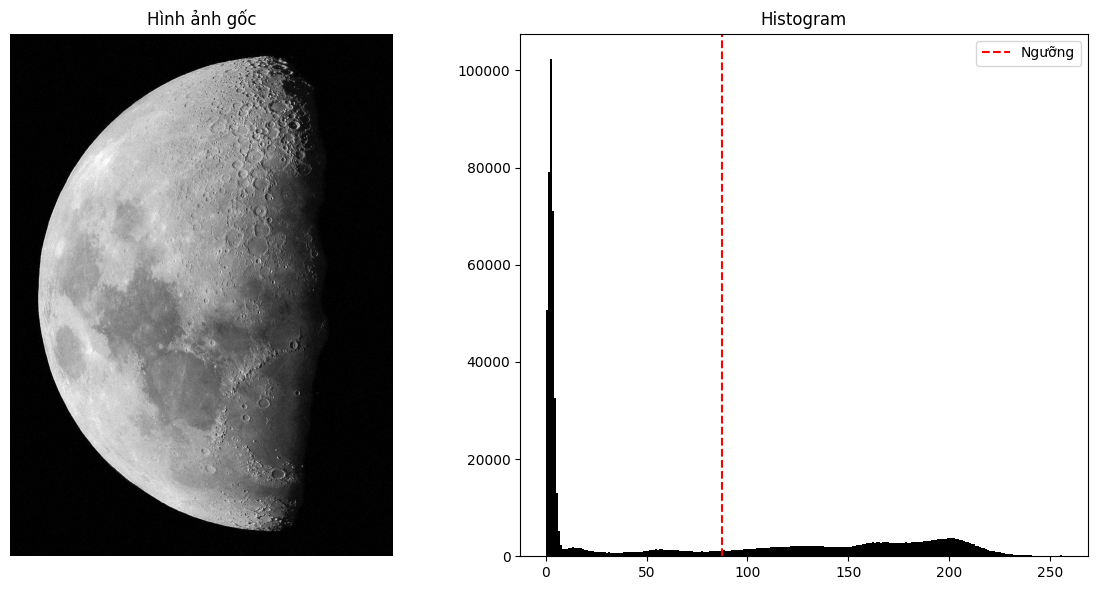

In [18]:
# Đọc hình ảnh dưới dạng thang độ xám
image = cv2.imread('/content/drive/MyDrive/XuLyAnh/LabThucHanh/Image/moon.jpg', cv2.IMREAD_GRAYSCALE)

def tim_nguong_toan_cuc(image):
    t = np.mean(image)
    g1 = []
    g2 = []
    m, n = image.shape

    while True:
        g1.clear()  # Xóa danh sách g1
        g2.clear()  # Xóa danh sách g2

        for i in range(m):
            for j in range(n):
                if image[i, j] < t:
                    g1.append(image[i, j])
                else:
                    g2.append(image[i, j])

        # Tính giá trị trung bình mới cho từng nhóm
        m1 = np.mean(g1) if g1 else 0
        m2 = np.mean(g2) if g2 else 0
        t_new = (m1 + m2) / 2
        delta_t = abs(t_new - t)

        if delta_t < 1:
            break
        t = t_new  # Cập nhật ngưỡng t

    print('Ngưỡng tìm được: ', t)
    return t

# Tìm ngưỡng toàn cục
threshold = tim_nguong_toan_cuc(image)

# Vẽ histogram
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Hình ảnh gốc')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Histogram')
plt.hist(image.ravel(), bins=256, range=[0, 256], color='black')
plt.axvline(x=threshold, color='red', linestyle='--', label='Ngưỡng')
plt.legend()

plt.tight_layout()
plt.show()

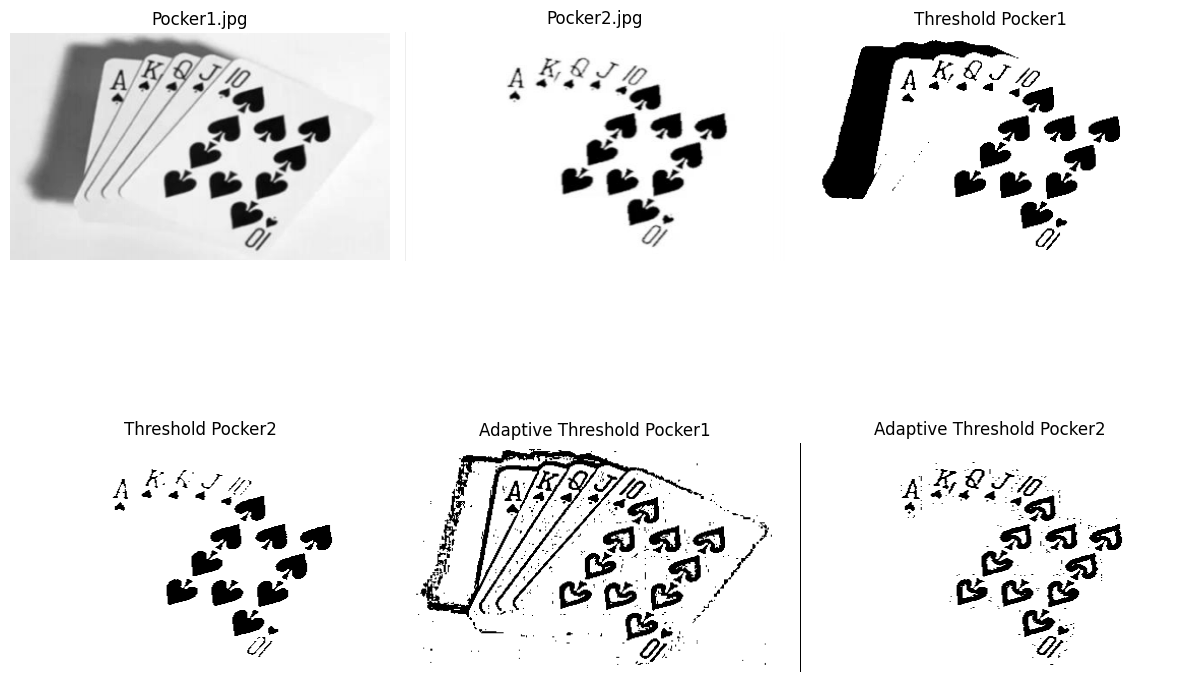

In [13]:
image1 = cv2.imread('/content/drive/MyDrive/XuLyAnh/LabThucHanh/Image/Pocker1.PNG',  cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/drive/MyDrive/XuLyAnh/LabThucHanh/Image/Pocker2.PNG',  cv2.IMREAD_GRAYSCALE)

# Ngưỡng hóa
ret1, thresh1 = cv2.threshold(image1, 128, 255, cv2.THRESH_BINARY)  # Ngưỡng đơn giản
ret2, thresh2 = cv2.threshold(image2, 128, 255, cv2.THRESH_BINARY)  # Ngưỡng đơn giản

# Ngưỡng thích ứng
thresh1_adaptive = cv2.adaptiveThreshold(image1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                         cv2.THRESH_BINARY, 11, 2)
thresh2_adaptive = cv2.adaptiveThreshold(image2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                         cv2.THRESH_BINARY, 11, 2)

# Hiển thị kết quả
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.title('Pocker1.jpg')
plt.imshow(image1, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Pocker2.jpg')
plt.imshow(image2, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Threshold Pocker1')
plt.imshow(thresh1, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Threshold Pocker2')
plt.imshow(thresh2, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Adaptive Threshold Pocker1')
plt.imshow(thresh1_adaptive, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title('Adaptive Threshold Pocker2')
plt.imshow(thresh2_adaptive, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

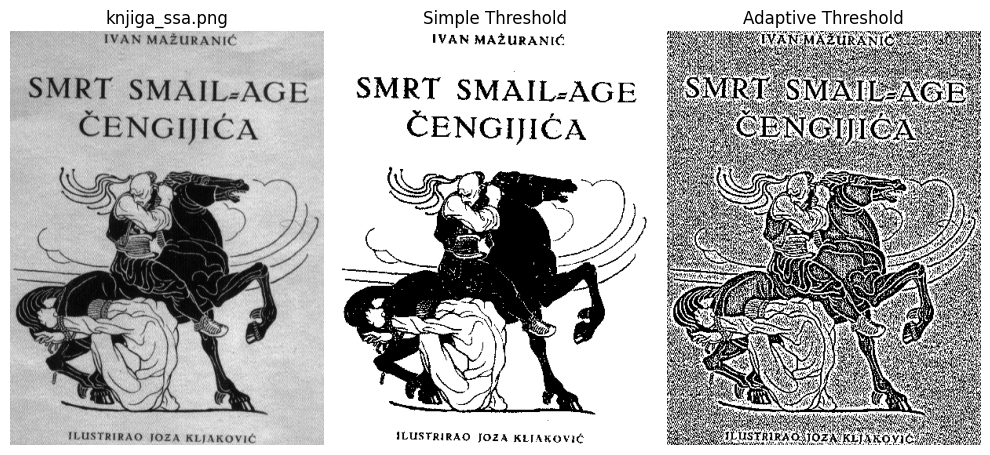

In [12]:
# Đọc hình ảnh dưới dạng thang độ xám
image = cv2.imread('/content/drive/MyDrive/XuLyAnh/LabThucHanh/Image/knjiga_ssa.png', cv2.IMREAD_GRAYSCALE)

# Ngưỡng hóa đơn giản
ret3, thresh_simple = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Ngưỡng thích ứng
thresh_adaptive = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                         cv2.THRESH_BINARY, 11, 2)

# Hiển thị kết quả
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title('knjiga_ssa.png')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Simple Threshold')
plt.imshow(thresh_simple, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Adaptive Threshold')
plt.imshow(thresh_adaptive, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()